# Credit_Card_Fraud_Detection

## Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## Loading the Dataset

In [18]:
df = pd.read_csv('credit_card_fraud_dataset.csv')

In [19]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [20]:
df.shape

(100000, 7)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   Amount           100000 non-null  float64
 2   MerchantID       100000 non-null  int64  
 3   TransactionType  100000 non-null  object 
 4   Location         100000 non-null  object 
 5   IsFraud          100000 non-null  int64  
 6   year             100000 non-null  int64  
 7   month            100000 non-null  int64  
 8   day              100000 non-null  int64  
 9   hour             100000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 7.6+ MB


In [50]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])  # Convert to datetime
df['year'] = df['TransactionDate'].dt.year
df['month'] = df['TransactionDate'].dt.month
df['day'] = df['TransactionDate'].dt.day
df['hour'] = df['TransactionDate'].dt.hour
df.drop('TransactionDate', axis=1, inplace=True)  # Drop the original timestamp column


In [52]:
df.head()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,year,month,day,hour
0,1,4189.27,688,refund,San Antonio,0,2024,4,3,14
1,2,2659.71,109,refund,Dallas,0,2024,3,19,13
2,3,784.00,394,purchase,New York,0,2024,1,8,10
3,4,3514.40,944,purchase,Philadelphia,0,2024,4,13,23
4,5,369.07,475,purchase,Phoenix,0,2024,7,12,18


In [53]:
df['TransactionType'].unique()


array(['refund', 'purchase'], dtype=object)

In [54]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])

# Check the encoded values
print(df['TransactionType'].unique())  # Output will be [0, 1]


[1 0]


In [58]:
df.head()

,TransactionID,Amount,MerchantID,TransactionType,IsFraud,year,month,day,hour
0,1,4189.27,688,1,0,2024,4,3,14
1,2,2659.71,109,1,0,2024,3,19,13
2,3,784.00,394,0,0,2024,1,8,10
3,4,3514.40,944,0,0,2024,4,13,23
4,5,369.07,475,0,0,2024,7,12,18


In [56]:
df['Location'].unique()


array(['San Antonio', 'Dallas', 'New York', 'Philadelphia', 'Phoenix',
       'Chicago', 'San Jose', 'San Diego', 'Houston', 'Los Angeles'],
      dtype=object)

In [57]:
df = df.drop('Location', axis=1)


In [60]:
df.isnull().sum()

TransactionID      0
Amount             0
MerchantID         0
TransactionType    0
IsFraud            0
year               0
month              0
day                0
hour               0
dtype: int64

In [59]:
df.duplicated().sum()

0

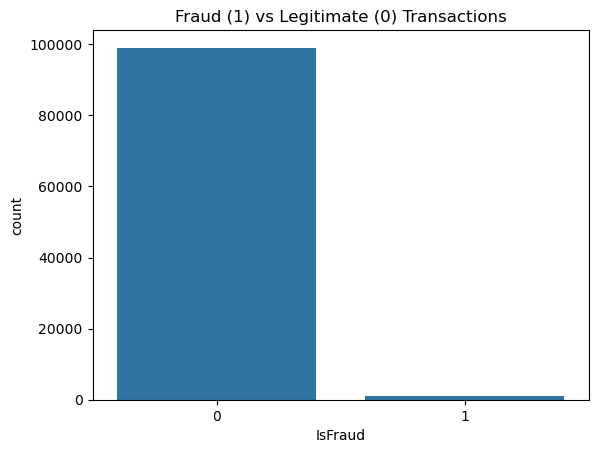

In [61]:
sns.countplot(x=df['IsFraud'])
plt.title("Fraud (1) vs Legitimate (0) Transactions")
plt.show()

In [62]:
x = df.drop('IsFraud', axis=1)  # Features
y = df['IsFraud']     

In [63]:
print(x.shape)
print(y.shape)

(100000, 8)
(100000,)


## Splitting into Training Sets and Testing Sets

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(70000, 8)
(30000, 8)
(70000,)
(30000,)


## Building ANN Classification Model

In [65]:
m1 = Sequential()

In [67]:
m1.add(Dense(16,activation='relu',input_dim=x_train.shape[1])) # Hidden Layer 1 has 16 neurons

m1.add(Dropout(0.5))

m1.add(Dense(8,activation='relu')) # Hidden Layer 2 has 8 neurons

m1.add(Dropout(0.5))

m1.add(Dense(4,activation='relu')) # Hidden Layer 3 has 4 neurons

m1.add(Dense(1,activation='sigmoid')) #sigmoid -> { so as the output must be either 0 or 1 } -> Output layer


In [68]:
m1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 530 (2.07 KB)

 Trainable params: 530 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In [69]:
m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

## Training

In [70]:
h1=m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 850us/step - acc: 0.9500 - loss: 0.2348 - val_acc: 0.9900 - val_loss: 0.0573
Epoch 2/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 771us/step - acc: 0.9897 - loss: 0.0703 - val_acc: 0.9900 - val_loss: 0.0560
Epoch 3/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 773us/step - acc: 0.9900 - loss: 0.0598 - val_acc: 0.9900 - val_loss: 0.0561
Epoch 4/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - acc: 0.9898 - loss: 0.0578 - val_acc: 0.9900 - val_loss: 0.0560
Epoch 5/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 773us/step - acc: 0.9908 - loss: 0.0529 - val_acc: 0.9900 - val_loss: 0.0560
Epoch 6/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 775us/step - acc: 0.9896 - loss: 0.0581 - val_acc: 0.9900 - val_loss: 0.0561
Epoch 7/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - acc: 0.9904 - loss: 0.0545 - val_acc: 0.9900 - val_loss: 0.0560
Epoch 8/20
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 770us/step - acc: 0.9903 - loss: 0.0546 - val_acc: 0.9900 - val_loss: 0.0560
Epoch 9/20
2188/2188 ━━━

In [71]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,acc,loss,val_acc,val_loss,Epochs
15,0.99,0.056069,0.99,0.056009,15
16,0.99,0.056020,0.99,0.056028,16
17,0.99,0.056057,0.99,0.056004,17
18,0.99,0.056027,0.99,0.056009,18
19,0.99,0.056007,0.99,0.056054,19


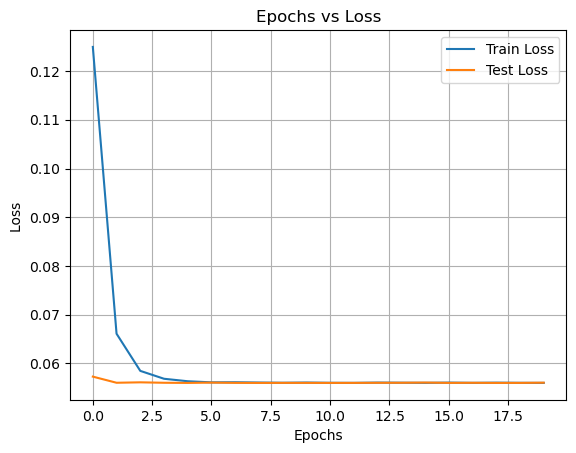

In [72]:
plt.plot(r1['Epochs'],r1['loss'],label='Train Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Test Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss ')
plt.legend()
plt.grid()
plt.show()

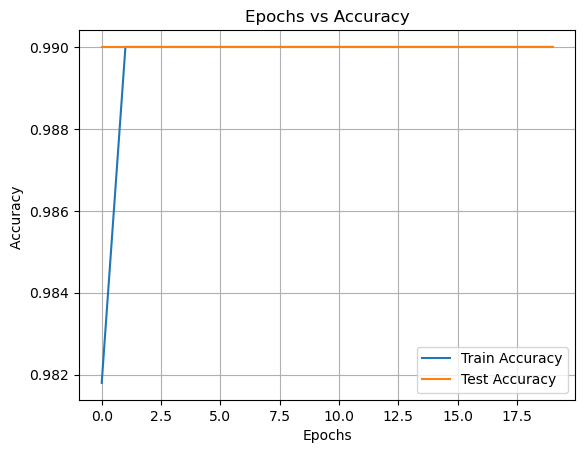

In [73]:
plt.plot(r1['Epochs'],r1['acc'],label='Train Accuracy')
plt.plot(r1['Epochs'],r1['val_acc'],label='Test Accuracy')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy ')
plt.legend()
plt.grid()
plt.show()


In [74]:
ypred=m1.predict(x_test)
ypred_m1 = [1 if i>0.5 else 0 for i in ypred]
print(ypred_m1[:7])

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 481us/step
[0, 0, 0, 0, 0, 0, 0]


In [78]:
print(confusion_matrix(y_test,ypred_m1))


[[29700     0]
 [  300     0]]


In [79]:
print(classification_report(y_test,ypred_m1, zero_division=1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       1.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.99      0.50      0.50     30000
weighted avg       0.99      0.99      0.99     30000



In [80]:
accuracy = accuracy_score(y_test, ypred_m1)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 99.00%
